In [1]:
import os
import os.path as osp
import pickle

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from mujoco_py import const
import wrappers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
EXP = 'DIVERSITY_ALPHA_05_Mon_Feb__1_09:36:50_2021'
EPOCH = 200
EPISODES = osp.join('./experiment', EXP, 'episode_logs', f'episode_{str(EPOCH)}.pkl')
ENV = osp.join('./experiment', EXP, 'env.pkl')

with open(EPISODES, 'rb') as f:
    episodes = pickle.load(f)
    
with open(ENV, 'rb') as f:
    env = pickle.load(f)

/opt/conda/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
states = episodes.env_infos['state']
gt_rewards = episodes.env_infos['gt_reward']
gt_rewards = np.clip(gt_rewards, -3, None)
scaled_gt_rewards = (gt_rewards - gt_rewards.min())
scaled_gt_rewards /= scaled_gt_rewards.max()

In [13]:
env.reset()
print(env.world.sim.data.time)
print(env.world.sim.data.qpos.shape)
print(env.world.sim.data.qpos)
print(env.world.sim.data.qvel.shape)
print(env.world.sim.data.qvel)
print(env.world.sim.data.act)
print(env.world.sim.udd_state)

0.0
(10,)
[ 0.          0.          0.         -1.3         0.9         0.19996
  0.93551133  0.          0.          0.3532967 ]
(9,)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
None
{}


In [15]:
states[0]

array([ 0.        ,  0.        ,  0.        ,  0.        , -1.3       ,
        0.9       ,  0.19996   , -0.01105464,  0.        ,  0.        ,
        0.9999389 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [21]:
env.reset()
positions = []
for state in states:
    env.world.sim.set_state_from_flattened(state)
    env.sim.forward()
    positions.append(env.robot_pos)

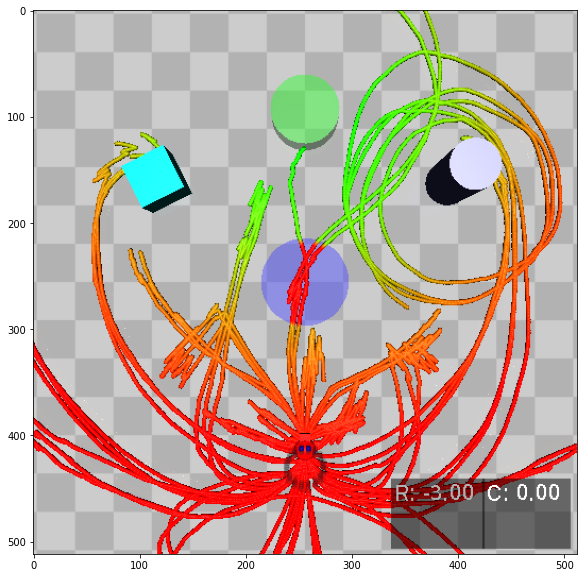

In [36]:
env.reset()
env.render('rgb_array')
for pos, gt_reward in zip(positions, scaled_gt_rewards):
    color = np.array([1-gt_reward, gt_reward, 0, 1])
    env.viewer.add_marker(pos=pos,
                          size=0.02 * np.ones(3),
                          type=const.GEOM_SPHERE,
                          rgba=color,
                          label='')

render = env.render('rgb_array')
figure(figsize=(10,10))
plt.imshow(render)